# COMP 4030 Assignment 7

**Deadline**: Nov 29, 2022 at 9AM

**NAME**:  Cheng Yang

---
**Problem 1**

A network of stations and roads, which connect stations together in some way, can be represented as a graph with nodes and edges.

Run the code below, you see a network with 10 stations and 12 roads.

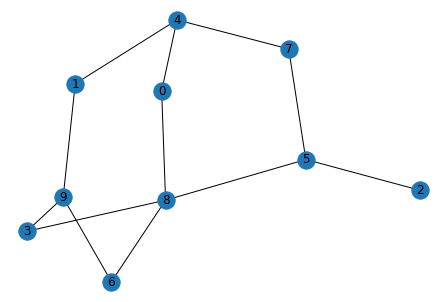

In [8]:
import networkx as nx
my_network = nx.gnp_random_graph(10, 0.25, seed=2021)
nx.draw(my_network, with_labels=True)

You'll write a program that determines if a set of cameras cover all roads in a network.

The input consists of (1) a configuration and (2) a graph with $n$ nodes.

A solution is a set of nodes, which is a list of $n$ boolean values which specify which stations have cameras.

The output is True if the cameras cover all roads.

For example, the solution [True,True,True,True,True,True,True,True,True,True] means that each statition has a camera.  These cameras cover all roads. If this solution is the input, the output is True.

This solution [True,False,False,True,True,True,False,False,True,True] means that a camera is placed at eah of these stations: 0, 3, 4, 5, 8, 9.   These cameras cover all roads.  If this solution is the input, the output is True.

This solution [True,False,False,True,True,True,False,False,False,False] means that a camera is placed at eah of these stations: 0, 3, 4, 5.   These cameras do not cover the road (1,9).  If this solution is the input, the output is False.




You must complete the function **is_valid** to check if a solution covers all roads in a network.

In [9]:
def get_list(solution):
    solution_list=[]
    result_list=[]
    for i in range(len(solution)):
        if solution[i]==True:
            solution_list.append(i)
    print(solution_list)
    return solution_list
def count_edge(solution_list,network):
    result_list=[]
    matrix=nx.adjacency_matrix(network)


    for element in solution_list:
        new_matrix=str(matrix[element]).replace('(0','('+str(element)).replace('\t1','').replace(' ','').replace('(','').replace(')','').split('\n')
        for i in new_matrix:
            if str(i[::-1]) not in result_list:
                print(i[::-1])
                result_list.append(i)
                #print(result_list)
    print(result_list)
    return len(result_list)

    
def is_valid(solution, network):
    if solution == [None]*10:
        return True
    else:
        solution_list=get_list(solution)
        edges=count_edge(solution_list,network)
    if edges==12:
        return True
    else:
        return False
        

solution=[True,False,False,True,True,True,False,False,True,True]
is_valid(solution,my_network)


[0, 3, 4, 5, 8, 9]
4,0
8,0
8,3
9,3
1,4
7,4
2,5
7,5
8,5
6,8
1,9
6,9
['0,4', '0,8', '3,8', '3,9', '4,1', '4,7', '5,2', '5,7', '5,8', '8,6', '9,1', '9,6']


True

---
**Problem 2**

Complete the function **bactrack** to generate all valid solutions of cameras that cover a network.  

Note: review assignment 6 to define a backtracking algorithm that includes an is_valid function.


In [10]:
def backtrack(solution, i, network):
    def get_list(solution):
        solution_list=[]
        result_list=[]
        for i in range(len(solution)):
            if solution[i]==True:
                solution_list.append(i)
        #print(solution_list)
        return solution_list
    def count_edge(solution_list,network):
        result_list=[]
        matrix=nx.adjacency_matrix(network)


        for element in solution_list:
            new_matrix=str(matrix[element]).replace('(0','('+str(element)).replace('\t1','').replace(' ','').replace('(','').replace(')','').split('\n')
            for i in new_matrix:
                if str(i[::-1]) not in result_list:
                    #print(i[::-1])
                    result_list.append(i)
        return len(result_list)
    def is_valid(solution, network):
        if solution == [None]*10:
            return True
        else:
            solution_list=get_list(solution)
            edges=count_edge(solution_list,network)
        if edges==12:
            return True
        else:
            return False
        
    if len(solution)==i:
        #print('precheck:', solution, get_list(solution))
        
        if is_valid(solution,my_network):
            print("\t",solution, '-->', get_list(solution))
    else:
        for p in[True,False]:
            solution[i]=p
            backtrack(solution, i+1, network)
backtrack([None]*len(solution),0,my_network)
            
        
        

	 [True, True, True, True, True, True, True, True, True, True] --> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
	 [True, True, True, True, True, True, True, True, True, False] --> [0, 1, 2, 3, 4, 5, 6, 7, 8]
	 [True, True, True, True, True, True, True, True, False, True] --> [0, 1, 2, 3, 4, 5, 6, 7, 9]
	 [True, True, True, True, True, True, True, True, False, False] --> [0, 1, 2, 3, 4, 5, 6, 7]
	 [True, True, True, True, True, True, True, False, True, True] --> [0, 1, 2, 3, 4, 5, 6, 8, 9]
	 [True, True, True, True, True, True, True, False, True, False] --> [0, 1, 2, 3, 4, 5, 6, 8]
	 [True, True, True, True, True, True, True, False, False, True] --> [0, 1, 2, 3, 4, 5, 6, 9]
	 [True, True, True, True, True, True, True, False, False, False] --> [0, 1, 2, 3, 4, 5, 6]
	 [True, True, True, True, True, True, False, True, True, True] --> [0, 1, 2, 3, 4, 5, 7, 8, 9]
	 [True, True, True, True, True, True, False, False, True, True] --> [0, 1, 2, 3, 4, 5, 8, 9]
	 [True, True, True, True, True, False, True, True

---
**Problem 3**

In this problem, you will revise the program in Problem 2, to find a solution that uses a minimum number of cameras.  You do this by keeping track of an optimal_configuration as you generate all valid configurations.

Note: review assignment 6

In [12]:
def backtrack(solution,i,network,best_solution):
    def get_list(solution):
        solution_list=[]
        result_list=[]
        for i in range(len(solution)):
            if solution[i]==True:
                solution_list.append(i)
        #print(solution_list)
        return solution_list
    def count_edge(solution_list,network):
        result_list=[]
        matrix=nx.adjacency_matrix(network)


        for element in solution_list:
            new_matrix=str(matrix[element]).replace('(0','('+str(element)).replace('\t1','').replace(' ','').replace('(','').replace(')','').split('\n')
            for i in new_matrix:
                if str(i[::-1]) not in result_list:
                    #print(i[::-1])
                    result_list.append(i)
        return len(result_list)
    def is_valid(solution, network):
        if solution == [None]*10:
            return True
        else:
            solution_list=get_list(solution)
            edges=count_edge(solution_list,network)
        if edges==12:
            return True
        else:
            return False
    def is_better(a_solution,best_solution):
        if get_list(best_solution)==[]:
            return True
        return len(get_list(a_solution)) < len(get_list(best_solution))
    if len(solution) == i:
        if is_valid(solution,network):
            print(solution, 'solution =', get_list(solution), 'current best:', get_list(best_solution))
            if is_better(solution, best_solution):
                for i in range(len(solution)):
                    best_solution[i] = solution[i]
                print('\t update best:', get_list(best_solution))
    else:
        for p in [True, False]:
            solution[i] = p
            backtrack(solution, i+1, network, best_solution)
best = [None]*len(solution)
backtrack([None]*len(solution),0,my_network,best)
        

[True, True, True, True, True, True, True, True, True, True] solution = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] current best: []
	 update best: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[True, True, True, True, True, True, True, True, True, False] solution = [0, 1, 2, 3, 4, 5, 6, 7, 8] current best: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
	 update best: [0, 1, 2, 3, 4, 5, 6, 7, 8]
[True, True, True, True, True, True, True, True, False, True] solution = [0, 1, 2, 3, 4, 5, 6, 7, 9] current best: [0, 1, 2, 3, 4, 5, 6, 7, 8]
[True, True, True, True, True, True, True, True, False, False] solution = [0, 1, 2, 3, 4, 5, 6, 7] current best: [0, 1, 2, 3, 4, 5, 6, 7, 8]
	 update best: [0, 1, 2, 3, 4, 5, 6, 7]
[True, True, True, True, True, True, True, False, True, True] solution = [0, 1, 2, 3, 4, 5, 6, 8, 9] current best: [0, 1, 2, 3, 4, 5, 6, 7]
[True, True, True, True, True, True, True, False, True, False] solution = [0, 1, 2, 3, 4, 5, 6, 8] current best: [0, 1, 2, 3, 4, 5, 6, 7]
[True, True, True, True, True, True, True, 

---
**Problem 4**

In this problem, you will add a to find a function **is_promising** to the backtracking algorithm that find the minimum number of cameras.  This function compares the current solution to the currently best solution, and if the current solution is worse, the backtracking algorithm does not expand that solution further.


Note: review assignment 6

In [13]:
def backtrack(solution,i,network,best_solution):
    def get_list(solution):
        solution_list=[]
        result_list=[]
        for i in range(len(solution)):
            if solution[i]==True:
                solution_list.append(i)
        #print(solution_list)
        return solution_list
    def count_edge(solution_list,network):
        result_list=[]
        matrix=nx.adjacency_matrix(network)


        for element in solution_list:
            new_matrix=str(matrix[element]).replace('(0','('+str(element)).replace('\t1','').replace(' ','').replace('(','').replace(')','').split('\n')
            for i in new_matrix:
                if str(i[::-1]) not in result_list:
                    #print(i[::-1])
                    result_list.append(i)
        return len(result_list)
    def is_valid(solution, network):
        if solution == [None]*10:
            return True
        else:
            solution_list=get_list(solution)
            edges=count_edge(solution_list,network)
        if edges==12:
            return True
        else:
            return False
    def is_better(a_solution,best_solution):
        if get_list(best_solution)==[]:
            return True
        return len(get_list(a_solution)) < len(get_list(best_solution))
    def is_promising(s, best_solution):
        if get_list(best_solution) != [] and len(get_list(s)) >= len(get_list(best_solution)):
            return False
        return True
    if len(solution) == i:
        if is_valid(solution,network):
            print(solution, 'solution =', get_list(solution), 'current best:', get_list(best_solution))
            if is_better(solution, best_solution):
                for i in range(len(solution)):
                    best_solution[i] = solution[i]
                print('\t update best:', get_list(best_solution))
    elif is_promising(solution[0:i], best_solution):
        for p in [True, False]:
            solution[i] = p
            backtrack(solution, i+1, network, best_solution)
best = [None]*len(solution)
backtrack([None]*len(solution),0,my_network,best)
        

[True, True, True, True, True, True, True, True, True, True] solution = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] current best: []
	 update best: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[True, True, True, True, True, True, True, True, True, False] solution = [0, 1, 2, 3, 4, 5, 6, 7, 8] current best: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
	 update best: [0, 1, 2, 3, 4, 5, 6, 7, 8]
[True, True, True, True, True, True, True, True, False, True] solution = [0, 1, 2, 3, 4, 5, 6, 7, 9] current best: [0, 1, 2, 3, 4, 5, 6, 7, 8]
[True, True, True, True, True, True, True, True, False, False] solution = [0, 1, 2, 3, 4, 5, 6, 7] current best: [0, 1, 2, 3, 4, 5, 6, 7, 8]
	 update best: [0, 1, 2, 3, 4, 5, 6, 7]
[True, True, True, True, True, True, True, False, False, True] solution = [0, 1, 2, 3, 4, 5, 6, 9] current best: [0, 1, 2, 3, 4, 5, 6, 7]
[True, True, True, True, True, True, True, False, False, False] solution = [0, 1, 2, 3, 4, 5, 6] current best: [0, 1, 2, 3, 4, 5, 6, 7]
	 update best: [0, 1, 2, 3, 4, 5, 6]
[True, Tru